In [ ]:
!pip3 install fairseq
!pip3 install fastbpe
!pip3 install vncorenlp
!pip3 install transformers

  Using cached fairseq-0.12.2.tar.gz (9.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached hydra_core-1.0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached omegaconf-2.0.6-py3-none-any.whl.metadata (3.0 kB)
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/d0/eb/9d63ce09dd8aa85767c65668d5414958ea29648a0eec80a4a7d311ec2684/omegaconf-2.0.6-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    PyYAML (>=5.1.*)
            ~~~~~~^
Please use pip<24.1 if you need to use this version.
  Using cached omegaconf-2.0.5-py3-none-any.whl.metadata (3.0 kB)
Requested omegaconf<2.1 from https://files.pythonhosted.org/packages/e5/f6/043b6d255dd6fbf2025110cea35b87f4c5100a181681d8eab496269f0d5b/omegaconf-2.0.5-py3-none-any.whl (from fairseq) has invalid metadata: .* suffix can on

In [ ]:
!pip3 install pytorch_lightning

In [ ]:
!pip3 install datasets

In [ ]:
!pip3 install evaluate

In [ ]:
pip install rouge_score

In [ ]:
from transformers import MBartForConditionalGeneration,T5ForConditionalGeneration
tokenizer = AutoTokenizer.from_pretrained("vinai/bartpho-syllable")
bartpho = T5ForConditionalGeneration.from_pretrained("VietAI/vit5-base")


In [ ]:
TXT = "Chúng tôi là <mask> nghiên cứu viên."
input_ids = tokenizer([TXT], return_tensors="pt")["input_ids"]
logits = bartpho(input_ids).logits
masked_index = (input_ids[0] == tokenizer.mask_token_id).nonzero().item()
probs = logits[0, masked_index].softmax(dim=0)
values, predictions = probs.topk(5)
print(tokenizer.decode(predictions).split())

['một', 'những', 'các', 'nghiên', 'nhóm']


In [ ]:
TXT = "Chúng tôi là <mask> nghiên cứu viên."
input_ids = tokenizer([TXT], return_tensors="pt")["input_ids"]
logits = bartpho(input_ids).logits
masked_index = (input_ids[0] == tokenizer.mask_token_id).nonzero().item()
probs = logits[0, masked_index].softmax(dim=0)
values, predictions = probs.topk(5)
print(tokenizer.decode(predictions).split())

ần Việt Nam, trí tuệ nhân tạo ( AI ) đang là xu hướng phát triển mạnh mẽ. Tối qua ( 19-10 ), tại buổi ra mắt VietAI Expo 2018, Viện Nghiên cứu và Phát triển Điều hành ( AI ) đã diễn ra buổi lễ ký kết thoả thuận hợp tác với một số doanh nghiệp trong lĩnh vực trí tuệ nhân tạo.


In [ ]:
import pandas as pd
import ast

In [ ]:
#Đọc các file CSV
df1 = pd.read_csv('/content/drive/MyDrive/Key2Text/Data/RawData/translated_dataset_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Key2Text/Data/RawData/translated_dataset_2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Key2Text/Data/RawData/translated_dataset_3.csv')

In [ ]:
# Nối các DataFrame
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
# Áp dụng word_segment cho cột 'text' và 'keywords'
df_combined['keywords_vi'] = df_combined['keywords_vi'].apply(ast.literal_eval)
df_combined['tex_vi_segmented'] = df_combined['text_vi'].apply(rdrsegmenter.word_segment)
df_combined['keywords_vi_segmented'] = df_combined['keywords_vi'].apply(
    lambda keywords: [rdrsegmenter.word_segment(keyword) for keyword in keywords]
)


# Lưu DataFrame với các cột mới vào file CSV
df_combined.to_csv('combined_segmented_dataset.csv', index=False)

In [ ]:
df_handsigh = pd.read_csv('/content/drive/MyDrive/Key2Text/Data/RawData/HandSighDataKeywords.csv')

In [ ]:
df_handsigh['keywords_vi'] = df_handsigh['keywords_vi'].apply(ast.literal_eval)

In [ ]:
print(type(df_handsigh.iloc[0]['keywords_vi']))

<class 'list'>


In [ ]:
df_handsigh.to_pickle('handsighk2t.pkl')

In [ ]:
print(df_handsigh.head(10))

                                         keywords_vi  \
0  [ngày thầy thuốc Việt Nam, ngày sức khỏe, bác ...   
1  [ngày giải phóng thủ đô, niềm vui, lịch sử dân...   
2  [ngày của cha, tình yêu gia đình, kỷ niệm ý ng...   
3   [ngày Quốc tế phụ nữ, tôn vinh, đóng góp xã hội]   
4              [ngày trẻ em 1-6, vui chơi, quà tặng]   
5  [ngày hội văn hóa, truyền thống dân tộc, giao ...   
6     [ngày gia đình Việt Nam, tình thân, sự gắn bó]   
7  [ngày Quốc khánh 2-9, tự hào dân tộc, lễ kỷ niệm]   
8      [ngày của mẹ, hạnh phúc gia đình, yêu thương]   
9    [ngày lễ hội Trung thu, trẻ em, bánh trung thu]   

                                             text_vi  
0   Ngày thầy thuốc Việt Nam là dịp để tôn vinh n...  
1   Ngày giải phóng thủ đô mang lại niềm vui cho ...  
2   Ngày của cha là kỷ niệm ý nghĩa để thể hiện t...  
3   Ngày Quốc tế phụ nữ là dịp để tôn vinh những ...  
4   Ngày trẻ em 1-6 là thời gian để các em nhỏ vu...  
5   Ngày hội văn hóa là cơ hội để giao lưu văn hó... 

In [ ]:
print(df_combined.head(10))

                       keywords                                          text  \
0  ['ski', 'mountain', 'skier']                  Skier skis down the mountain   
1  ['ski', 'mountain', 'skier']            A skier is skiing down a mountain.   
2  ['ski', 'mountain', 'skier']  Three skiers are skiing on a snowy mountain.   
3        ['wag', 'tail', 'dog']                  The dog is wagging his tail.   
4        ['wag', 'tail', 'dog']               A dog wags his tail at the boy.   
5        ['wag', 'tail', 'dog']            a dog wags its tail with its heart   
6   ['lake', 'paddle', 'canoe']                woman paddling canoe on a lake   
7   ['lake', 'paddle', 'canoe']             paddle an open canoe along lake .   
8   ['lake', 'paddle', 'canoe']          a man paddles his canoe on the lake.   
9  ['station', 'train', 'pull']                    a train pulls into station   

                                             text_vi  \
0                Vận động viên trượt tuyết xuống núi

In [ ]:
print(type(df_combined['keywords_vi'].iloc[0]))

<class 'str'>


In [ ]:
def flatten_and_join(nested_list, as_string=False):
    flattened_list = [word for sublist in nested_list for word in sublist]
    return " ".join(flattened_list)


def clean(keywords):
    source_text = " ".join(map(str, keywords))
    return source_text

def make_dataset(dataset):
    df = dataset
    df["keywords_vi"] = df["keywords_vi"].apply(clean)
    return df

def make_dataset_vncore(dataset):
        df = dataset
        df["tex_vi_segmented"] = df["tex_vi_segmented"].apply(clean)
        df["keywords_vi_segmented"] = df["keywords_vi_segmented"].apply(flatten_and_join)
        return df

In [ ]:
a = make_dataset(df_handsigh.head(10))


NameError: name 'df_handsigh' is not defined

In [ ]:
print(a.head(10))

                                         keywords_vi  \
0  ngày thầy thuốc Việt Nam ngày sức khỏe bác sĩ ...   
1    ngày giải phóng thủ đô niềm vui lịch sử dân tộc   
2     ngày của cha tình yêu gia đình kỷ niệm ý nghĩa   
3       ngày Quốc tế phụ nữ tôn vinh đóng góp xã hội   
4                  ngày trẻ em 1-6 vui chơi quà tặng   
5  ngày hội văn hóa truyền thống dân tộc giao lưu...   
6         ngày gia đình Việt Nam tình thân sự gắn bó   
7      ngày Quốc khánh 2-9 tự hào dân tộc lễ kỷ niệm   
8          ngày của mẹ hạnh phúc gia đình yêu thương   
9        ngày lễ hội Trung thu trẻ em bánh trung thu   

                                             text_vi  
0   Ngày thầy thuốc Việt Nam là dịp để tôn vinh n...  
1   Ngày giải phóng thủ đô mang lại niềm vui cho ...  
2   Ngày của cha là kỷ niệm ý nghĩa để thể hiện t...  
3   Ngày Quốc tế phụ nữ là dịp để tôn vinh những ...  
4   Ngày trẻ em 1-6 là thời gian để các em nhỏ vu...  
5   Ngày hội văn hóa là cơ hội để giao lưu văn hó... 

In [ ]:
import pandas as pd
#train_data = pd.read_pickle('/content/drive/MyDrive/Key2Text/Data/PreprocessData/combined_segmented_dataset.pkl')
train_data2 = pd.read_csv('/content/drive/MyDrive/Key2Text/Data/RawData/HandSighDataKeywords.csv')


In [ ]:
train_data2['keywords_vi'] = train_data2['keywords_vi'].apply(ast.literal_eval)

In [ ]:
train_data2 = make_dataset(train_data2)

In [ ]:
print(type(train_data2['keywords_vi'].iloc[0]))

<class 'str'>


In [ ]:
print(train_data2.head(10))

                                         keywords_vi  \
0  ngày thầy thuốc Việt Nam ngày sức khỏe bác sĩ ...   
1    ngày giải phóng thủ đô niềm vui lịch sử dân tộc   
2     ngày của cha tình yêu gia đình kỷ niệm ý nghĩa   
3       ngày Quốc tế phụ nữ tôn vinh đóng góp xã hội   
4                  ngày trẻ em 1-6 vui chơi quà tặng   
5  ngày hội văn hóa truyền thống dân tộc giao lưu...   
6         ngày gia đình Việt Nam tình thân sự gắn bó   
7      ngày Quốc khánh 2-9 tự hào dân tộc lễ kỷ niệm   
8          ngày của mẹ hạnh phúc gia đình yêu thương   
9        ngày lễ hội Trung thu trẻ em bánh trung thu   

                                             text_vi  
0   Ngày thầy thuốc Việt Nam là dịp để tôn vinh n...  
1   Ngày giải phóng thủ đô mang lại niềm vui cho ...  
2   Ngày của cha là kỷ niệm ý nghĩa để thể hiện t...  
3   Ngày Quốc tế phụ nữ là dịp để tôn vinh những ...  
4   Ngày trẻ em 1-6 là thời gian để các em nhỏ vu...  
5   Ngày hội văn hóa là cơ hội để giao lưu văn hó... 

In [ ]:
import torch
from transformers import (
    AutoModel,
    AutoTokenizer,
)
import re

class K2TPipeline:
    def __init__(
        self, model: AutoModel, tokenizer: AutoTokenizer, use_cuda: bool
    ):
        self.model = model
        self.tokenizer = tokenizer
        self.device = "cuda" if torch.cuda.is_available() and use_cuda else "cpu"
        self.model.to(self.device)

        self.model_type = "k2t"

        self.default_generate_kwargs = {
            "max_length": 512,
            "num_beams": 4,
            "length_penalty": 1.5,
            "no_repeat_ngram_size": 3,
            "early_stopping": True,
        }

    def __call__(self, keywords, **kwargs):
        inputs = self._prepare_inputs_for_k2t(keywords)
        result = ""
        if not kwargs:
            kwargs = self.default_generate_kwargs

        for txt in inputs:
            input_ids = self._tokenize("{} </s>".format(txt), padding=False)
            outputs = self.model.generate(input_ids.to(self.device), **kwargs)
            result += self.tokenizer.decode(outputs[0])

        result = re.sub("<pad>|</s>", "", result)
        return result.strip()

    def _prepare_inputs_for_k2t(self, keywords):
        text = str(keywords)
        text = text.replace(",", "|")
        text = text.replace("'", "")
        text = text.replace("[", "")
        text = text.replace("]", "")
        texts = text.split(".")
        return texts

    def _tokenize(
        self,
        inputs,
        padding=True,
        truncation=True,
        add_special_tokens=True,
        max_length=1024,
    ):
        inputs = self.tokenizer.encode(
            inputs,
            max_length=max_length,
            add_special_tokens=add_special_tokens,
            truncation=truncation,
            padding="max_length" if padding else False,
            pad_to_max_length=padding,
            return_tensors="pt",
        )
        return inputs

In [ ]:
from os import access
import shutil

import torch
import numpy as np
import pandas as pd
import evaluate
from tqdm.auto import tqdm
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    AutoTokenizer,
)
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning import LightningDataModule
from pytorch_lightning import Trainer
from getpass import getpass
from huggingface_hub import HfApi, Repository
from pathlib import Path

In [ ]:
class DataModule(Dataset):
    """
    Data Module for pytorch
    """

    def __init__(
        self,
        data: pd.DataFrame,
        tokenizer: AutoTokenizer,
        source_max_token_len: int = 512,
        target_max_token_len: int = 512,
    ):
        """

        :param data:
        :param tokenizer:
        :param source_max_token_len:
        :param target_max_token_len:
        """
        self.data = data
        self.target_max_token_len = target_max_token_len
        self.source_max_token_len = source_max_token_len
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):
        data_row = self.data.iloc[index]

        keywords_encoding = self.tokenizer(
            data_row["keywords_vi"],
            max_length=self.source_max_token_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt",
        )

        text_encoding = self.tokenizer(
            data_row["text_vi"],
            max_length=self.target_max_token_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt",
        )

        labels = text_encoding["input_ids"]
        labels[labels == 0] = -100

        return dict(
            keywords=data_row["keywords_vi"],
            text=data_row["text_vi"],
            keywords_input_ids=keywords_encoding["input_ids"].flatten(),
            keywords_attention_mask=keywords_encoding["attention_mask"].flatten(),
            labels=labels.flatten(),
            labels_attention_mask=text_encoding["attention_mask"].flatten(),
        )


class PLDataModule(LightningDataModule):
    def __init__(
        self,
        train_df: pd.DataFrame,
        test_df: pd.DataFrame,
        tokenizer: AutoTokenizer,
        source_max_token_len: int = 512,
        target_max_token_len: int = 512,
        batch_size: int = 4,
        split: float = 0.1,
    ):
        """

        :param data_df:
        :param tokenizer:
        :param source_max_token_len:
        :param target_max_token_len:
        :param batch_size:
        :param split:
        """
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.split = split
        self.batch_size = batch_size
        self.target_max_token_len = target_max_token_len
        self.source_max_token_len = source_max_token_len
        self.tokenizer = tokenizer

    def setup(self, stage=None):
        self.train_dataset = DataModule(
            self.train_df,
            self.tokenizer,
            self.source_max_token_len,
            self.target_max_token_len,
        )
        self.test_dataset = DataModule(
            self.test_df,
            self.tokenizer,
            self.source_max_token_len,
            self.target_max_token_len,
        )

    def train_dataloader(self):
        """training dataloader"""
        return DataLoader(
            self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=2
        )

    def test_dataloader(self):
        """test dataloader"""
        return DataLoader(
            self.test_dataset, batch_size=self.batch_size, shuffle=False, num_workers=2
        )

    def val_dataloader(self):
        """validation dataloader"""
        return DataLoader(
            self.test_dataset, batch_size=self.batch_size, shuffle=False, num_workers=2
        )

In [ ]:
a = DataModule(data=train_data, tokenizer=tokenizer)

NameError: name 'tokenizer' is not defined

In [ ]:
print(a[0])

NameError: name 'a' is not defined

In [ ]:
dataloader = DataLoader(a, batch_size=1, shuffle=True)

In [ ]:
for batch in dataloader:
    print(batch)  # Kiểm tra xem batch có đúng định dạng không
    break

{'keywords': ['rời khỏi mặt_trời mọc thuyền'], 'text': ['lúc mặt_trời mọc một chiếc thuyền đánh_cá rời bến cảng .'], 'keywords_input_ids': tensor([[   0,  965,  353, 2907, 2713, 2374,    2,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1, 

In [ ]:
class LightningModel(pl.LightningModule):
    """PyTorch Lightning Model class"""

    def __init__(self, tokenizer, model, output: str = "outputs"):
        """
        initiates a PyTorch Lightning Model
        Args:
            tokenizer : VIT5 tokenizer
            model : VIT5 model
            output (str, optional): output directory to save model checkpoints. Defaults to "outputs".
        """
        super().__init__()
        self.model = model
        self.tokenizer = tokenizer
        self.output = output
        # self.val_acc = Accuracy()
        # self.train_acc = Accuracy()

    def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
        """forward step"""
        output = self.model(
            input_ids,
            attention_mask=attention_mask,
            labels=labels,
            decoder_attention_mask=decoder_attention_mask,
        )

        return output.loss, output.logits

    def training_step(self, batch, batch_size):
        """training step"""
        input_ids = batch["keywords_input_ids"]
        attention_mask = batch["keywords_attention_mask"]
        labels = batch["labels"]
        labels_attention_mask = batch["labels_attention_mask"]

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels,
        )
        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_size):
        """validation step"""
        input_ids = batch["keywords_input_ids"]
        attention_mask = batch["keywords_attention_mask"]
        labels = batch["labels"]
        labels_attention_mask = batch["labels_attention_mask"]

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels,
        )
        self.log("val_loss", loss, prog_bar=True, logger=True)
        return loss

    def test_step(self, batch, batch_size):
        """test step"""
        input_ids = batch["keywords_input_ids"]
        attention_mask = batch["keywords_attention_mask"]
        labels = batch["labels"]
        labels_attention_mask = batch["labels_attention_mask"]

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels,
        )

        self.log("test_loss", loss, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        """configure optimizers"""
        return AdamW(self.parameters(), lr=0.0001)

In [ ]:
class trainer:
    """
    Keytotext model trainer
    """

    def __init__(self):
        pass

    def from_pretrained(self, model_name="VietAI/vit5-base"):
        """
        Download Model from HF hub
        :param model_name: T5
        :return: Download the model and tokenizer
        """
        self.tokenizer = AutoTokenizer.from_pretrained(f"{model_name}")
        self.model = T5ForConditionalGeneration.from_pretrained(
            f"{model_name}", return_dict=True
        )

    def train(
        self,
        train_df: pd.DataFrame,
        test_df: pd.DataFrame,
        source_max_token_len: int = 512,
        target_max_token_len: int = 512,
        batch_size: int = 8,
        max_epochs: int = 5,
        outputdir: str = "outputs",
        early_stopping_patience_epochs: int = 0,  # 0 to disable early stopping feature
        test_split=0.1,
    ):
        """
        trains VIT% model on custom dataset
        Args:
            data_df (pd.DataFrame): training datarame. Dataframe must have 2 column --> "keywords" and "text"
            source_max_token_len (int, optional): max token length of source text. Defaults to 512.
            target_max_token_len (int, optional): max token length of target text. Defaults to 512.
            batch_size (int, optional): batch size. Defaults to 8.
            max_epochs (int, optional): max number of epochs. Defaults to 5.
            use_gpu (bool, optional): if True, model uses gpu for training. Defaults to True.
            outputdir (str, optional): output directory to save model checkpoints. Defaults to "outputs".
            early_stopping_patience_epochs (int, optional): monitors val_loss on epoch end and stops training,
             if val_loss does not improve after the specied number of epochs. set 0 to disable early stopping.
             Defaults to 0 (disabled)
            :param test_df:
            :param train_df:
        """
        self.target_max_token_len = target_max_token_len
        self.max_epoch = max_epochs
        self.train_df = train_df
        self.test_df = test_df

        self.data_module = PLDataModule(
            train_df=train_df,
            test_df=test_df,
            tokenizer=self.tokenizer,
            batch_size=batch_size,
            source_max_token_len=source_max_token_len,
            target_max_token_len=target_max_token_len,
            split=test_split,
        )

        self.K2TModel = LightningModel(
            tokenizer=self.tokenizer, model=self.model, output=outputdir
        )

        logger = WandbLogger(project="keytotext")

        early_stop_callback = (
            [
                EarlyStopping(
                    monitor="val_loss",
                    min_delta=0.00,
                    patience=early_stopping_patience_epochs,
                    verbose=True,
                    mode="min",
                )
            ]
            if early_stopping_patience_epochs > 0
            else None
        )

        use_gpu = torch.cuda.is_available()
        gpus = "gpu" if use_gpu else "cpu"
        trainer = Trainer(
            logger=logger,
            callbacks=early_stop_callback,
            max_epochs=max_epochs,
            accelerator=gpus,
        )

        trainer.fit(self.K2TModel, self.data_module)

    def load_model(self, model_dir: str = "outputs", use_gpu: bool = False):
        """
        loads a checkpoint for inferencing/prediction
        Args:
            model_dir (str, optional): path to model directory. Defaults to "outputs".
            use_gpu (bool, optional): if True, model uses gpu for inferencing/prediction. Defaults to True.
        """
        self.model = T5ForConditionalGeneration.from_pretrained(f"{model_dir}")
        self.tokenizer = AutoTokenizer.from_pretrained(f"{model_dir}")

        if use_gpu:
            if torch.cuda.is_available():
                self.device = torch.device("cuda")
            else:
                raise Exception(
                    "exception ---> no gpu found. set use_gpu=False, to use CPU"
                )
        else:
            self.device = torch.device("cpu")

        self.model = self.model.to(self.device)

    def save_model(self, model_dir="model"):
        """
        Save model to dir
        :param model_dir:
        :return: model is saved
        """
        path = f"{model_dir}"
        self.tokenizer.save_pretrained(path)
        self.model.save_pretrained(path)

    def predict(
    self,
    keywords: list,
    max_length: int = 512,
    num_return_sequences: int = 1,
    num_beams: int = 2,
    top_k: int = 50,
    top_p: float = 0.95,
    do_sample: bool = True,
    repetition_penalty: float = 2.5,
    length_penalty: float = 1.0,
    early_stopping: bool = True,
    skip_special_tokens: bool = True,
    clean_up_tokenization_spaces: bool = True,
    use_gpu: bool = True,
  ):
        """
        Generates prediction for K2T model
        Args:
            Keywords (list): any keywords for generating predictions
            max_length (int, optional): max token length of prediction. Defaults to 512.
            num_return_sequences (int, optional): number of predictions to be returned. Defaults to 1.
            num_beams (int, optional): number of beams. Defaults to 2.
            top_k (int, optional): Defaults to 50.
            top_p (float, optional): Defaults to 0.95.
            do_sample (bool, optional): Defaults to True.
            repetition_penalty (float, optional): Defaults to 2.5.
            length_penalty (float, optional): Defaults to 1.0.
            early_stopping (bool, optional): Defaults to True.
            skip_special_tokens (bool, optional): Defaults to True.
            clean_up_tokenization_spaces (bool, optional): Defaults to True.
            use_gpu: Defaults to True.
        Returns:
            str: returns predictions
        """
        if use_gpu:
            if torch.cuda.is_available():
                self.device = torch.device("cuda")
            else:
                raise Exception("No GPU found. Set use_gpu=False to use CPU.")
        else:
            self.device = torch.device("cpu")

        # Move the model to the correct device
        self.model.to(self.device)

        source_text = " ".join(map(str, keywords))

        # Tokenize the input and move to the correct device
        input_ids = self.tokenizer.encode(
            source_text, return_tensors="pt", add_special_tokens=True
        ).to(self.device)

        # Generate predictions using the model on the correct device
        generated_ids = self.model.generate(
            input_ids=input_ids,
            num_beams=num_beams,
            max_length=max_length,
            repetition_penalty=repetition_penalty,
            length_penalty=length_penalty,
            early_stopping=early_stopping,
            top_p=top_p,
            top_k=top_k,
            num_return_sequences=num_return_sequences,
        )

        # Decode the generated ids and return predictions
        preds = [
            self.tokenizer.decode(
                g,
                skip_special_tokens=skip_special_tokens,
                clean_up_tokenization_spaces=clean_up_tokenization_spaces,
            )
            for g in generated_ids
        ]

        return preds[0]

    def evaluate(self, test_df: pd.DataFrame, metrics: str = "rouge"):
      """
      :param test_df: DataFrame chứa dữ liệu kiểm tra với cột "input_text" và "output_text"
      :param metrics: Tên của metric để tính toán (mặc định là "rouge")
      :return: Output metrics cho keytotext
      """
      # Tải metric ROUGE
      metric = evaluate.load(metrics)

      input_text = test_df["keywords_vi"]
      references = test_df["text_vi"].str.strip().tolist()

      # Dự đoán cho từng input_text
      predictions = [self.predict(x) for x in input_text]

      # Tính toán các metric
      results = metric.compute(predictions=predictions, references=references)

      return results

In [ ]:
from transformers import AutoTokenizer,MBartForConditionalGeneration,T5ForConditionalGeneration

In [ ]:
model = trainer()
model.from_pretrained()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/820k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/904M [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(train_data2, test_size=0.1, random_state=42)
eval_df = test_df

In [ ]:
model.train(train_df=train_df, test_df=eval_df, batch_size=4, max_epochs=1)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params | Mode
------------------------------------------------------------
0 | model | T5ForConditionalGeneration | 225 M  | eval
------------------------------------------------------------
225 M     Trainable params
0         Non-trainable params
225 M     Total params
903.804   Total estimated model params size (MB)
0         Modules in train mode
541       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
import os

# Kiểm tra đường dẫn hiện tại
current_path = os.getcwd()
print("Đường dẫn hiện tại:", current_path)
new_path = '/content/drive/MyDrive/Key2Text/Data/weights_handsigh/2'

# Thay đổi đường dẫn
os.chdir(new_path)
current_path = os.getcwd()
print("Đường dẫn hiện tại:", current_path)

Đường dẫn hiện tại: /content
Đường dẫn hiện tại: /content/drive/MyDrive/Key2Text/Data/weights_handsigh/2


In [ ]:
for param in model2.model.parameters():
  param.data = param.data.contiguous()

In [ ]:
model2.save_model("weights_hansight_k2t")

In [ ]:
model2 = trainer()
model2.load_model("/content/drive/MyDrive/weights")

In [ ]:
model2.train(train_df=train_df, test_df=eval_df, batch_size=4, max_epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: vuhoangtuankiet (vuhoangtuankiet-hanoi-university-of-civil-engineering). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params | Mode
------------------------------------------------------------
0 | model | T5ForConditionalGeneration | 225 M  | eval
------------------------------------------------------------
225 M     Trainable params
0         Non-trainable params
225 M     Total params
903.804   Total estimated model params size (MB)
0         Modules in train mode
541       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
pred = model2.predict(['địa chỉ','đồng bằng sông hồng','anh ấy'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [ ]:
print(pred)

Địa chỉ chính xác giúp chúng ta dễ dàng tìm thấy đồng bằng sông hồng.


In [ ]:
input_text = [['địa chỉ','đồng bằng sông hồng','anh ấy'], ['nhân viên', 'tự giác', 'ngày lễ']]

In [ ]:
predictions = [model2.predict(x) for x in input_text]

In [ ]:
print(predictions)

['Địa chỉ chính xác giúp chúng ta dễ dàng tìm thấy đồng bằng sông hồng.', 'Ngày lễ của nhân viên là dịp để tự giác và tổ chức các hoạt động thể chất.']


In [ ]:
metric = evaluate.load('rouge')

In [ ]:
print(results["rouge1"])

1.0


In [ ]:
model2.evaluate(test_df=eval_df)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'rouge1': 0.4589090746315133,
 'rouge2': 0.09046090879700769,
 'rougeL': 0.2970872283922886,
 'rougeLsum': 0.2971746522451487}

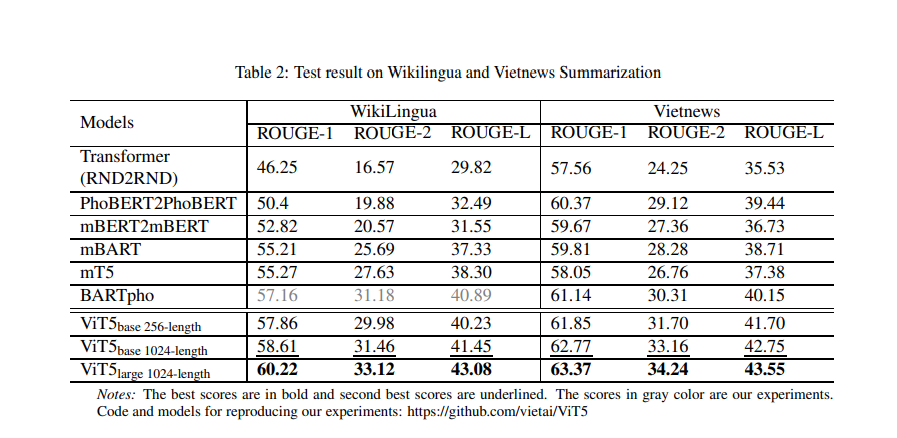

In [ ]:
print(eval_df["text_vi"].str.strip().tolist())

['Ngày hội sáng tạo trẻ khuyến khích tài năng và phát triển ý tưởng mới.', 'Ngày hội văn hóa dân tộc là dịp để giao lưu văn hóa và học hỏi kinh nghiệm từ các dân tộc khác nhau.', 'Ngày Người khuyết tật Việt Nam 18-4 giúp nâng cao nhận thức về quyền lợi của người khuyết tật.', 'Thói quen tốt là chìa khóa để cải thiện sức khỏe và nâng cao chất lượng cuộc sống.', 'Ngày bảo vệ môi trường kêu gọi hành động thiết thực và nâng cao nhận thức về bảo vệ thiên nhiên.', 'Ngày hội nghệ thuật truyền thống tôn vinh giá trị văn hóa của dân tộc.', 'Ngày Giải phóng miền Nam 30-4 là dấu mốc quan trọng cho tự do của đất nước.', 'Ngày Phụ nữ Việt Nam là dịp để tôn vinh những đóng góp của phụ nữ trong mọi lĩnh vực.', 'Ngày quốc tế về gia đình tôn vinh gia đình và khuyến khích gắn kết.', 'Có những điều không nên làm để tránh rắc rối.', 'Sự khích lệ từ người khác có thể tạo động lực làm việc và nâng cao hiệu suất cá nhân.', 'Ngày của Mẹ là dịp để bày tỏ tình cảm và lòng biết ơn với mẹ.', 'Ngày hội khởi nghiệp